![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [102]:
# Start your code here!
import pandas as pd

In [103]:
women =pd.read_csv("women_results.csv")

In [104]:
women.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro
3,3,1969-11-02,Italy,Denmark,3,1,Euro
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship


In [105]:
women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-null   int64 
 1   date        4884 non-null   object
 2   home_team   4884 non-null   object
 3   away_team   4884 non-null   object
 4   home_score  4884 non-null   int64 
 5   away_score  4884 non-null   int64 
 6   tournament  4884 non-null   object
dtypes: int64(3), object(4)
memory usage: 267.2+ KB


In [106]:
men=pd.read_csv("men_results.csv")

In [107]:
men.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly


In [108]:
men.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.4+ MB


In [109]:
women.shape

(4884, 7)

In [110]:
men.shape

(44353, 7)

In [111]:
men.describe(include='all')

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
count,44353.000000,44353,44353,44353,44353.000000,44353.000000,44353
unique,NaN,15547,311,306,NaN,NaN,141
top,NaN,2012-02-29,Brazil,Uruguay,NaN,NaN,Friendly
freq,NaN,66,594,560,NaN,NaN,17519
mean,22176.000000,NaN,NaN,NaN,1.740559,1.178793,NaN
std,12803.752581,NaN,NaN,NaN,1.748722,1.394580,NaN
min,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,11088.000000,NaN,NaN,NaN,1.000000,0.000000,NaN
50%,22176.000000,NaN,NaN,NaN,1.000000,1.000000,NaN
75%,33264.000000,NaN,NaN,NaN,2.000000,2.000000,NaN


In [112]:
women.describe(include='all')

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
count,4884.000000,4884,4884,4884,4884.000000,4884.000000,4884
unique,NaN,1931,198,196,NaN,NaN,30
top,NaN,2018-04-10,United States,Denmark,NaN,NaN,UEFA Euro qualification
freq,NaN,20,269,151,NaN,NaN,1445
mean,2441.500000,NaN,NaN,NaN,2.272727,1.431409,NaN
std,1410.033688,NaN,NaN,NaN,2.736377,1.974651,NaN
min,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,1220.750000,NaN,NaN,NaN,0.000000,0.000000,NaN
50%,2441.500000,NaN,NaN,NaN,1.000000,1.000000,NaN
75%,3662.250000,NaN,NaN,NaN,3.000000,2.000000,NaN


In [113]:
women['tournament'].value_counts()

UEFA Euro qualification                 1445
Algarve Cup                              551
FIFA World Cup                           284
AFC Championship                         268
Cyprus Cup                               258
African Championship qualification       226
UEFA Euro                                184
African Championship                     173
FIFA World Cup qualification             172
CONCACAF Gold Cup qualification          143
AFC Asian Cup qualification              141
Copa América                             131
Olympic Games                            130
CONCACAF Gold Cup                        126
Friendly                                 111
AFC Asian Cup                            111
Four Nations Tournament                  106
OFC Championship                          78
African Cup of Nations qualification      58
CONCACAF Championship                     42
SheBelieves Cup                           39
Euro                                      20
African Cu

In [114]:
men['tournament'].value_counts()

Friendly                                17519
FIFA World Cup qualification             7878
UEFA Euro qualification                  2585
African Cup of Nations qualification     1932
FIFA World Cup                            964
                                        ...  
Real Madrid 75th Anniversary Cup            1
Évence Coppée Trophy                        1
Copa Confraternidad                         1
TIFOCO Tournament                           1
FIFA 75th Anniversary Cup                   1
Name: tournament, Length: 141, dtype: int64

In [115]:
men['date']=pd.to_datetime(men['date']) 

In [116]:
women['date']=pd.to_datetime(women['date']) 

In [117]:
men.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  44353 non-null  int64         
 1   date        44353 non-null  datetime64[ns]
 2   home_team   44353 non-null  object        
 3   away_team   44353 non-null  object        
 4   home_score  44353 non-null  int64         
 5   away_score  44353 non-null  int64         
 6   tournament  44353 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 2.4+ MB


In [118]:
men_1=men[(men['tournament']=='FIFA World Cup')& (men['date']>='2002-01-01')]

In [119]:
women_1=women[(women['tournament']=='FIFA World Cup')& (women['date']>='2002-01-01')]

In [120]:
men_1['total_score']=men_1['home_score'] + men_1['away_score']

In [121]:
women_1['total_score']=women_1['home_score'] + women_1['away_score']

array([[<AxesSubplot: title={'center': 'total_score'}>]], dtype=object)

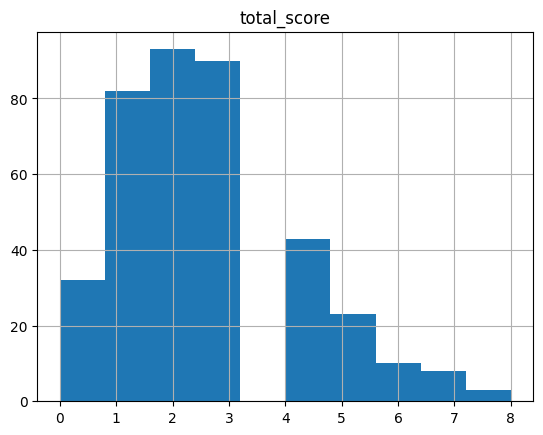

In [122]:
men_1.hist(column='total_score')

array([[<AxesSubplot: title={'center': 'total_score'}>]], dtype=object)

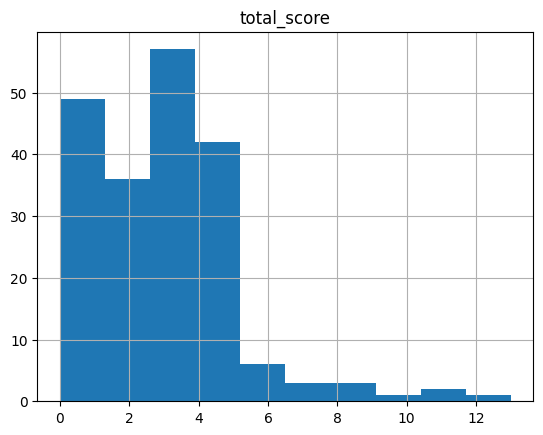

In [123]:
women_1.hist(column='total_score')

In [124]:
import scipy.stats as stats
from scipy.stats import kstest
kstest(men_1['total_score'], 'norm')

KstestResult(statistic=0.7580114127352096, pvalue=4.802304083566536e-230)

In [125]:
kstest(women_1['total_score'], 'norm')

KstestResult(statistic=0.8113447460685429, pvalue=9.431656241073109e-144)

In [126]:
r=stats.mannwhitneyu(x=women_1['total_score'], y=men_1['total_score'], alternative = 'greater')

In [127]:
p_val=r.pvalue

In [128]:

if r.pvalue<=0.01:
    result ='reject'
else:
    result="fail to reject"


In [129]:
result_dict = {"p_val": p_val, "result": result}

In [130]:
result_dict

{'p_val': 0.005106609825443641, 'result': 'reject'}